# **Business Understanding**

**Contents**

* Business Understanding
* Data Understanding
* Prepare Data
* Modeling
* Evalutaion

# **1. Business Understanding**
The data contains information of various games released over last 40 years from 1984 across various platforms and genres from various publishers.
The analysis project answers the following questions:
1. Which Genre has become most popular - Completed
2. Which Platform has revieved most popularity - Completed
3. A Time-Series Analysis of the Global Sales Trend of last 40 years - Completed
4. Publishers with most Global Sales along with which country offers the maximum of these sales - Completed

# **2. Data Understanding**
In this chapter of the analysis, we will load in the data and then trim and clean the dataset for analysis.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
#loading the data
game = pd.read_csv("../input/vid-gem/Video_Games_Sales_as_at_22_Dec_2016.csv", encoding= 'unicode_escape')

game.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#checking the column where the amount of data missing is maximum
missing_percent = game.isnull().mean()

missing_values = pd.DataFrame({'column_name': game.columns,
                                 'percent_missing_values': missing_percent})

missing_values.sort_values(by=['percent_missing_values'], ascending=False).head()

,column_name,percent_missing_values
User_Count,User_Count,0.546025
Critic_Score,Critic_Score,0.513308
Critic_Count,Critic_Count,0.513308
Rating,Rating,0.404869
User_Score,User_Score,0.400981


In [4]:
#dropping the 6 columns
game = game.drop(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1)

In [5]:
game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **3. Data Preparation**
In this chapter we discover that there are still columns and rows with some values missing so we go ahead to clean and trim further to make the dataset completely workable 

In [6]:
#checking which coulmns have NaN values across the dataset
game.isna().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher          False
NA_Sales            True
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
dtype: bool

Though here the "Publisher" column showcases 0 NaN values. The fact is that the real data set does have 54 missing values in the column. But since it is an important column for my analysis question, instead of dropping it, I researched and appended the information to my local dataset. Thus, eleminationg its missing values.

In [7]:
#checking count of NaN values in the column
count = game["Publisher"].isna().sum()

print(count)

0


As we can see "Year of Release" has over 269 missing values. Unfortunately these are alot of values to be researched in a day. Hence, These particluar rows were dropped.

In [8]:
##checking count of NaN values in the column
count = game["Year_of_Release"].isna().sum()

print(count)

269


In [9]:
#dropping the partcular rows with the NaN values with respect to the column
game = game[pd.notnull(game['Year_of_Release'])]

Similarly, for "Genre" the 2 rows with the missing values were dropped.

In [10]:
count = game["Genre"].isna().sum()

print(count)

2


In [11]:
game = game[pd.notnull(game['Name'])]

In [12]:
game.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000
mean,2006.488996,0.263965,0.145895,0.078472,0.047583,0.53617
std,5.877470,0.818286,0.506660,0.311064,0.187984,1.55846
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.01000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.06000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.17000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.47000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.53000


# **4. Modeling**
We then build different visualising models to analysse the data to answer the  questions.

In [13]:
#Defining a graph plotting function
def plot_func(x, y, x_title=None, y_title=None):
    plt.bar(x,y)
    plt.xlabel(x_title)
    plt.ylabel(y_title)

# **A) Which Platform has been the most popular to play games on? - Completed**

,Global_Sales
Platform,
PS2,2127
DS,2122
PS3,1306
Wii,1286
X360,1232


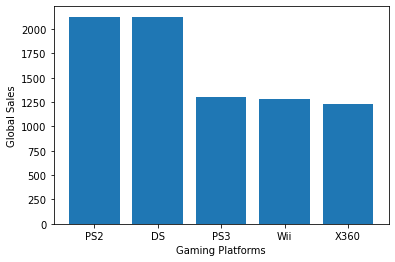

In [14]:
sales_platform = game.groupby(by='Platform').count()['Global_Sales'].sort_values(ascending=False)

sales_platform = sales_platform.to_frame()

sales_platform.head(5)

sales_height =  sales_platform.index.tolist()

plot_func.figsize=(10,10)

plot_func(sales_height[:5], sales_platform.iloc[:5].Global_Sales.values.tolist(), x_title="Gaming Platforms", y_title="Global Sales")

sales_platform.head(5)

# **B) Which Genre has become most popular - Completed**

,Global_Sales
Genre,
Action,3308
Sports,2306
Misc,1721
Role-Playing,1483
Shooter,1296


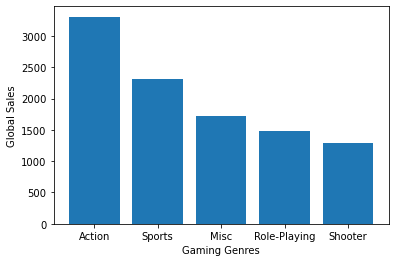

In [15]:
sales_genre = game.groupby(by='Genre').count()['Global_Sales'].sort_values(ascending=False)

sales_genre = sales_genre.to_frame()

sales_height =  sales_genre.index.tolist()

plot_func(sales_height[:5], sales_genre.iloc[:5].Global_Sales.values.tolist(), x_title="Gaming Genres", y_title="Global Sales")

sales_genre.head(5)

# **C) A Time-Series Analysis of the Global Sales Trend of last 40 years - Completed**

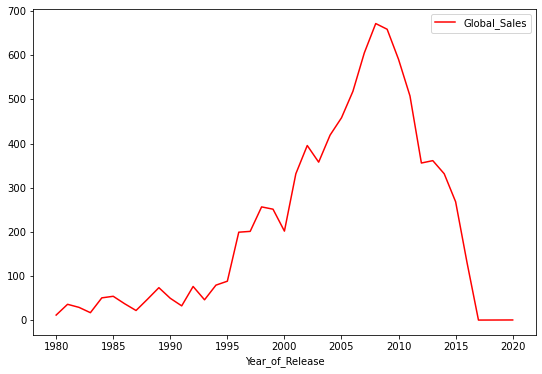

In [16]:
#game_year = game.sort_values('Year_of_Release')

sales_year = game.groupby(by='Year_of_Release')['Global_Sales'].sum()

sales_year = sales_year.to_frame()

sales_year.plot(figsize=(9,6), color='Red')

# **D) Publishers with most Global Sales along with which country offers the maximum of these sales - Completed**

,Global_Sales
Publisher,
Electronic Arts,1344
Activision,977
Namco Bandai Games,937
Ubisoft,930
Konami Digital Entertainment,825


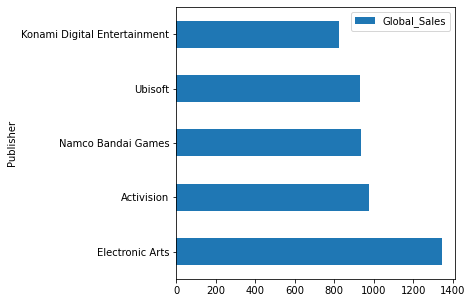

In [17]:
sales_publisher = game.groupby(by='Publisher').count()['Global_Sales'].sort_values(ascending=False)

sales_publisher = sales_publisher.to_frame()

sales_publisher.iloc[:5].plot.barh(figsize=(5,5))

sales_publisher.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Activision,429.79,214.42,6.71,75.29
Electronic Arts,588.65,370.02,14.29,126.82
Konami Digital Entertainment,88.67,67.93,91.03,29.54
Namco Bandai Games,69.82,42.17,127.62,14.55
Ubisoft,252.12,161.72,7.35,49.09


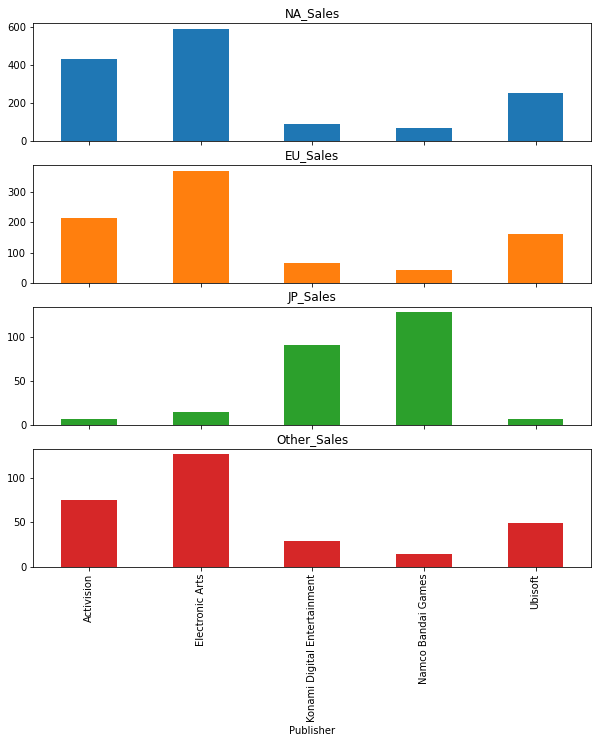

In [18]:
subset = game[["Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

subset = subset[subset["Publisher"].isin(['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment'])]

subset = subset.groupby(by='Publisher').sum()

subset.plot.bar(figsize=(10,10),subplots=True,legend=False)

plt.ylabel('')

subset

# **5. Evaluation**
A) Most selling gaming Platform is Sony's PS2(2127 Million games sold), followed by Nintendo DS, Sony's PS3, Nintendo Wii and finally Microsoft XBOX 360

B) The most selling gaming genre is Action (3308 Million games sold), second is Sports then comes Miscellaneous, Role-Playing and finally Shooting.

C) The Time-Series Analysis showcases that till 1995 the video game sales were up and down. Then there was a steady rise in sales with fewer variations in the trend. Then in 2000, the sales picked up even more and the decade of the 2010s saw a sharp and huge rise in video games sales volume. From there, there was a sharp fall in revenue till 2015. From there the sales have been slow but picking up.

D)The publisher with the most games sold is Electronic Arts(1344 Million games sold), followed by Activision then comes Namco Bandai Games, Ubisoft and lastly, Konami Digital Entertainment.

Electronic Arts, Activision and Ubisoft all recieve their maximum sales from North America. With the exception of Namco Bandai Games and Konami Digital Entertainment owing their maximum sales from the country of Japan.


# **Conclusion**
There are many ways one can conduct further analytics on the gaming industry. Comparing different Sales Regions or even Experimenting to find various different attributes affecting the sales of the games. In fact, additional work can be done on the dataset itself regarding the missing values in the customer and critic scores for each game for more in-depth analysis.